# 2016 California Election Exploration

_© Jerod Sun 2020. This is a large project with work in progress._

Todo:
- confidence intervals
- ML algos
- refactor dataframe for F and pval

### Objective: 

Gather insight into voting characteristics and patterns from precinct-by-precinct election results in 2016 combined with census data. Propose questions and targeted campaign strategies based on analysis. Build classification and/or regression models on statistically significant relationships.

### Overview:

To what extend do individual candidates and campaigns persuade voters? On the precinct-level, what kind of voters are more or less likely to vote a split ticket? What about turnout? The results of the last two statewide elections in California provide valuable insight into these questions.

The 2016 and 2018 statewide elections in California featured several unique characteristics. In both years, two Democratic candidates advanced from the blanket primary to the general election for a statewide election. 

- In the 2016 Senate race, California Attorney General Kamala Harris (D) won against Rep. Loretta Sanchez (D). 

- In the 2018 Lieutenant Gubernatorial election, former Ambassador Eleni Kounalakis (D) won against State Sen. Ed Hernandez (D). 

- Also in 2018, Steve Poizner, previously elected Insurance Commissioner as a Republican in 2006, ran as an independent. While Gavin Newsom easily defeated John Cox in the gubernatorial election, Poizner ran a much closer race. 

In 2020, the US will conduct a decennial census. This will provide an up-to-date comparison to the old 2010 data. ESRI (ArcGIS) has provided estimates. Block groups will change; however, the business logic should be idempotent.

`election_exploration_squash_merger.ipynb` contains business logic for joining  precinct Election Data with ArcGIS Census data and the 2017 ACS Survey Data using the relational data obtained from QGIS.


### Voting in California: 

Apart from Presidential races, California has a [top-two primary system](https://ballotpedia.org/Top-two_primary). Therefore, it is possible for two candidates of the same party to compete in the general election.

California also has an early voting period and absentee voting. All citizens can choose to vote by mail when they register to vote (“permanent vote-by-mail voter").

In 2018, several Republican House candidates, such as incumbents Mimi Walters and David Valadao, lead on election night, but absentee ballots postmarked on or before election day ultimately broke the race against their favor. 

### Preliminaries:

Voters are individual decision-makers. Much like financial markets, past performance does not gurantee future results. Quantitative analysis into political voting patterns are useful for analyzing the _result_, not the _decision-making process_. Patterns and macro trends are quantitative - the conclusions and actions to be taken from them are not so obvious.

### Guiding Questions for this Exploration:

- Is there a voting pattern of Hispanics favoring the Hispanic candidate in single-party races? What about other demographic groups?

- What does the visualization of population density vs. candidate percentage look like?

- Counties have evolved quite differently from their original demographics. On the county level, are there any significant trends that differ between counties? Any where linear regression can be applied on each to calculate slope?

- What kind of precincts had the most split-ticket voters? Are there any trends with the delta, normalized for down-ballot drop-off, with any of the census data? Statistically, are these the district types with the most swing voters and candidates and parties should spend the greatest effort in targeting?

- What is the correlation between the candidates and propositions?

- In single-party races, are there any characteristics of the voters of the other party?

In [62]:
# Scientific Computing
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np

# from scipy.stats import randint, uniform
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import RandomizedSearchCV, train_test_split #, GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.feature_selection import f_regression

import pickle as p
import datetime as dt

We will import the results from `election_exploration_squash_merger.ipynb`.

__This is the merged result of Precinct Election Data, ArcGIS Census data and the 2017 ACS Survey Data.__

In [2]:
# Import final dataframe

df = pd.read_csv('2016_sq_result.csv')
print(df.columns[:44])
print(df.columns[44:125])
print(df.columns[125:])

Index(['OBJECTID', 'pres_clinton', 'pres_trump', 'pres_johnson', 'pres_stein',
       'pres_lariva', 'pres_other', 'ussenate_harris', 'ussenate_sanchez',
       'prop51_yes', 'prop51_no', 'prop52_yes', 'prop52_no', 'prop53_yes',
       'prop53_no', 'prop54_yes', 'prop54_no', 'prop55_yes', 'prop55_no',
       'prop56_yes', 'prop56_no', 'prop57_yes', 'prop57_no', 'prop58_yes',
       'prop58_no', 'prop59_yes', 'prop59_no', 'prop60_yes', 'prop60_no',
       'prop61_yes', 'prop61_no', 'prop62_yes', 'prop62_no', 'prop63_yes',
       'prop63_no', 'prop64_yes', 'prop64_no', 'prop65_yes', 'prop65_no',
       'prop66_yes', 'prop66_no', 'prop67_yes', 'prop67_no', 'votedensity'],
      dtype='object')
Index(['STATE_FIPS', 'CNTY_FIPS', 'STCOFIPS', 'TRACT', 'BLKGRP', 'FIPS',
       'POPULATION', 'POP_SQMI', 'POP2010', 'POP10_SQMI', 'WHITE', 'BLACK',
       'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE',
       'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19',


In [3]:
# precinct threshold cutoff

df_sig = df[(df['pres_clinton'] > 10) & (df['pres_trump'] > 10)]

### Visualizations

Start with simple visualizations on some features.

Text(0, 0.5, 'Percent vote for Sanchez')

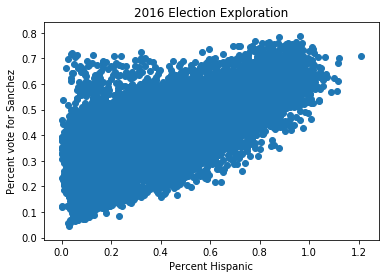

In [4]:
plt.title('2016 Election Exploration')
plt.scatter(df_sig['pct_hispanic'], df_sig['pct_sanchez'])
plt.xlabel('Percent Hispanic')
plt.ylabel('Percent vote for Sanchez')

# Sanchez is from Orange County

There is a noticible correlation between % hispanic and Sanchez's vote share.

Change this later:

First should be some simple visualizations. Then strong correlations between certain data. Then reshape (?) dataframe for F and pval. 


Text(0, 0.5, 'Percent vote for Trump')

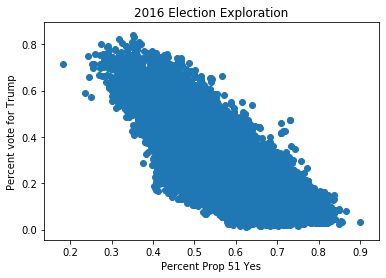

In [5]:
plt.title('2016 Election Exploration')
plt.scatter(df_sig['pct_prop51_yes'], df_sig['pct_trump'])
plt.xlabel('Percent Prop 51 Yes')
plt.ylabel('Percent vote for Trump')

# FYI:
# Total votes: 14,610,509
# President: 14,181,595
# Registered voters: 19,411,771


Text(0, 0.5, 'Percent vote for Trump')

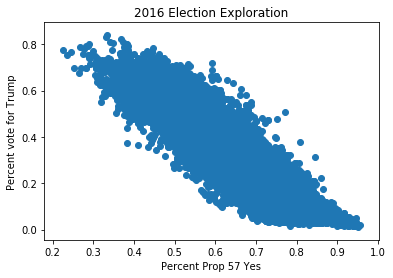

In [6]:
plt.title('2016 Election Exploration')
plt.scatter(df_sig['pct_prop57_yes'], df_sig['pct_trump'])
plt.xlabel('Percent Prop 57 Yes')
plt.ylabel('Percent vote for Trump')

# Total votes: 13,620,436


Text(0, 0.5, 'Percent Trump')

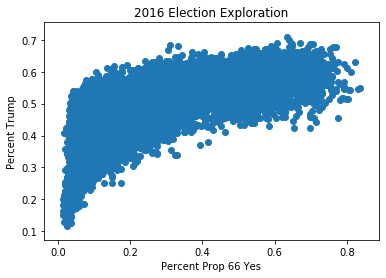

In [7]:
plt.title('2016 Election Exploration')
plt.scatter(df_sig['pct_trump'], df_sig['pct_prop66_yes'])
plt.xlabel('Percent Prop 66 Yes')
plt.ylabel('Percent Trump')

Text(0, 0.5, 'Percent Trump')

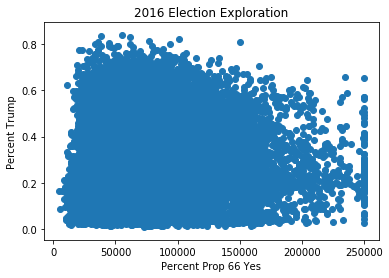

In [8]:
plt.title('2016 Election Exploration')
plt.scatter(df['Estimates: Median household income in the past 12 months (in 2017 inflation-adjusted dollars)'], df['pct_trump'])
plt.xlabel('Percent Prop 66 Yes')
plt.ylabel('Percent Trump')



Text(0, 0.5, 'Percent Prop 67 Yes')

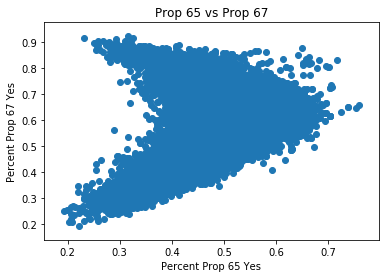

In [9]:
plt.title('Prop 65 vs Prop 67')
mask = (df[df['prop65_yes'] > 60])

plt.scatter(mask['pct_prop65_yes'], mask['pct_prop67_yes'])
plt.xlabel('Percent Prop 65 Yes')
plt.ylabel('Percent Prop 67 Yes')

This looks like an arrow sign. Pretty cool? But there's something more interesting going on...

##  Prop 65 and Prop 67

### Background

Prop 65 "Redirects money collected by grocery and certain other retail stores through mandated sale of carryout bags" to a special environmental fund.

Prop 67 "prohibits grocery and other stores from providing customers single–use plastic or paper carryout bags".

Prop 65 failed 46.10% to 53.90%

Prop 67 passed 53.27% to 46.73%

[Full text](https://vig.cdn.sos.ca.gov/2016/general/en/pdf/text-proposed-laws.pdf) of the ballot proposition.
[Alt](https://web.archive.org/web/20161016122612/http://vig.cdn.sos.ca.gov/2016/general/en/pdf/text-proposed-laws.pdf)


[Prop 65](https://en.wikipedia.org/wiki/2016_California_Proposition_65)

[Prop 67](https://en.wikipedia.org/wiki/2016_California_Proposition_67)




### Proposition 65

<img src="./images/CaliforniaProposition65.png" width=300>

### Proposition 67

<img src="./images/CaliforniaProposition67.png" width=300>

Let's look at 4 different cultural centers in California:

- San Francisco County (SF, Nancy Pelosi)
- Santa Clara (Bay Area)
- San Diego (Suburban SoCal)
- Kern (Bakersfield, Kevin McCarthy)

Text(0.5, 1.0, 'All Precincts: Prop 65 vs Prop 67 Vote')

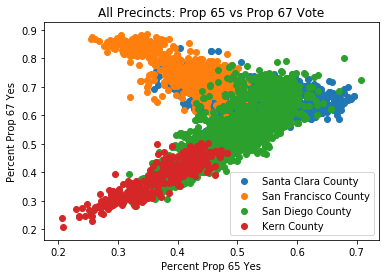

In [10]:
mask = (df[df['prop65_yes'] > 60])

counties = ['Santa Clara County', 'San Francisco County', 'San Diego County', 'Kern County']
for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]['pct_prop65_yes'], mask[mask['County Name'] == ct]['pct_prop67_yes'])
    
plt.legend(counties)
plt.xlabel('Percent Prop 65 Yes')
plt.ylabel('Percent Prop 67 Yes')
plt.title('All Precincts: Prop 65 vs Prop 67 Vote')

__Now, the two trends seem to be clearer.__

On the surface, the two texts appear to appeal to the same groups. Indeed, outside of the bay area, the correlation was almost always 1.

From personal experience, activism in SF contributed to the disparity: See sources below.

Several Democratic-leaning organizations advised a vote for prop 67 and against prop 65.

- [League of Woman Voters](https://lwvc.org/vote/elections/ballot-recommendations/prop-65-sowing-confusion-about-plastic-bag-ban)
- [SF Chronicle](https://www.sfchronicle.com/opinion/editorials/article/Chronicle-recommends-Yes-on-Prop-67-No-on-9187312.php)
- [California Democratic Party](https://www.cadem.org/vote/body/CDP-Propositions.pdf)
- [San Diego Republican Party](http://www.sandiegorepublicans.org/2016-endorsements.html)

- The California Democratic Party's official position was no endorsement for prop 65, and yes on 67.

- The San Diego Republican Party's official position was yes on prop 65 and no on 67.

### What conclusion can we draw?

- Voting percentages show political leanings.

- Cluster density shows the relative political homogeneity in the district.

- __Negative Correlation: Different information sources and voting logic.__

Below are several Bay Area counties plotted on one graph.

Text(0.5, 1.0, 'All Precincts: Prop 65 vs Prop 67 Vote')

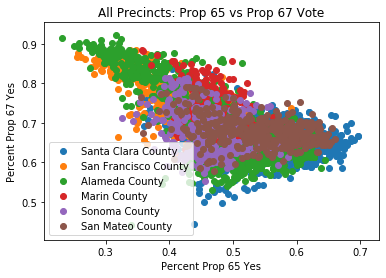

In [11]:
mask = (df[df['prop65_yes'] > 60])
# mask = df

# counties = ['Santa Clara County', 'San Francisco County', 'San Diego County', 'Kern County']
counties = ['Santa Clara County', 'San Francisco County', 'Alameda County', "Marin County", 'Sonoma County', 'San Mateo County']
for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]['pct_prop65_yes'], mask[mask['County Name'] == ct]['pct_prop67_yes'])
    
plt.legend(counties)
plt.xlabel('Percent Prop 65 Yes')
plt.ylabel('Percent Prop 67 Yes')
plt.title('All Precincts: Prop 65 vs Prop 67 Vote')


### Further segmentation

Text(0.5, 1.0, 'Majority Non-White Census Blocks Only')

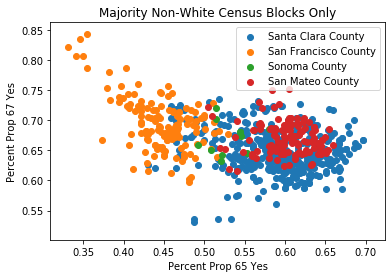

In [12]:
# new mask
mask = (df[df['pct_white'] < .25])
mask = (mask[mask['prop65_yes'] > 60])

# counties = ['Santa Clara County', 'San Francisco County', 'San Diego County', 'Kern County']
counties = ['Santa Clara County', 'San Francisco County', 'Sonoma County', 'San Mateo County']

for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]['pct_prop65_yes'], mask[mask['County Name'] == ct]['pct_prop67_yes'])
    
plt.legend(counties)
plt.xlabel('Percent Prop 65 Yes')
plt.ylabel('Percent Prop 67 Yes')
plt.title('Majority Non-White Census Blocks Only')

Text(0.5, 1.0, 'Majority Non-Hispanic White Census Blocks Only')

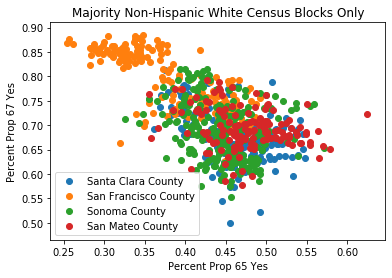

In [13]:
# new mask
mask = (df[df['pct_white'] > .6])
mask = (mask[mask['prop65_yes'] > 20])

# counties = ['Santa Clara County', 'San Francisco County', 'Orange County', 'Kern County']
counties = ['Santa Clara County', 'San Francisco County', 'Sonoma County', 'San Mateo County']

for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]['pct_prop65_yes'], mask[mask['County Name'] == ct]['pct_prop67_yes'])
    
plt.legend(counties)
plt.xlabel('Percent Prop 65 Yes')
plt.ylabel('Percent Prop 67 Yes')
plt.title('Majority Non-Hispanic White Census Blocks Only')

Text(0.5, 1.0, 'Majority Hispanic Census Blocks Only')

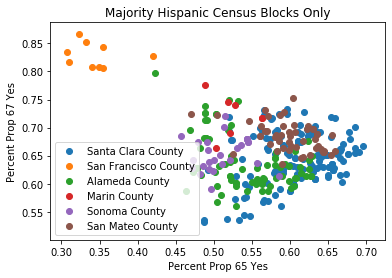

In [14]:
# new mask
mask = (df[df['pct_hispanic'] > .5])
mask = (mask[mask['prop65_yes'] > 20])

counties = ['Santa Clara County', 'San Francisco County', 'Alameda County', "Marin County", 'Sonoma County', 'San Mateo County']
for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]['pct_prop65_yes'], mask[mask['County Name'] == ct]['pct_prop67_yes'])
    
plt.legend(counties)
plt.xlabel('Percent Prop 65 Yes')
plt.ylabel('Percent Prop 67 Yes')
plt.title('Majority Hispanic Census Blocks Only')

Text(0.5, 1.0, 'Election Exploration')

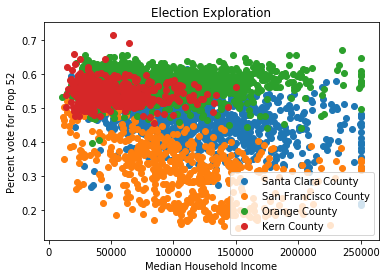

In [15]:
mask = df[df['Estimates: Median household income in the past 12 months (in 2017 inflation-adjusted dollars)'] > 30000]
# mask = mask[mask['Estimates: Median household income in the past 12 months (in 2017 inflation-adjusted dollars)'] < 150000]
mask = df
counties = ['Santa Clara County', 'San Francisco County', 'Orange County', 'Kern County']
for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]\
                ['Estimates: Median household income in the past 12 months (in 2017 inflation-adjusted dollars)'], 
                mask[mask['County Name'] == ct]['pct_prop53_yes'])
    
plt.legend(counties)
plt.xlabel('Median Household Income')
plt.ylabel('Percent vote for Prop 52')
plt.title('Election Exploration')

_More visualizations to follow._

But on to the exciting part...

## Machine Learning

Below is the distribution of a census block group's Hispanic population percentage vs Sanchez's vote share in the 2016 Senate Race. 
We will use this to calculate each block group's deviation from the norm.

Text(0, 0.5, 'Percent vote for Sanchez')

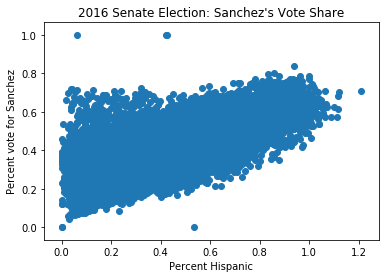

In [16]:
plt.title('2016 Senate Election: Sanchez\'s Vote Share')
plt.scatter(mask['pct_hispanic'], mask['pct_sanchez'])
plt.xlabel('Percent Hispanic')
plt.ylabel('Percent vote for Sanchez')

Text(0.5, 1.0, 'Sanchez Vote Share Exploration')

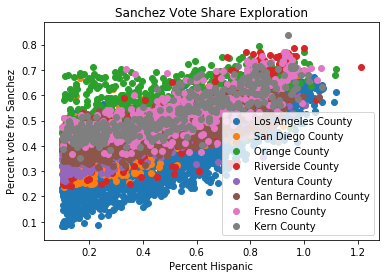

In [17]:
# new mask
mask = (df[df['ussenate_sanchez'] > 10])
mask = mask[mask['pct_hispanic'] > 0.1]
counties = ['Los Angeles County','San Diego County', 'Orange County', 'Riverside County', 'Ventura County', 'San Bernardino County', 'Fresno County', 'Kern County']
for ct in counties:
    plt.scatter(mask[mask['County Name'] == ct]['pct_hispanic'], mask[mask['County Name'] == ct]['pct_sanchez'])
plt.legend(counties)
plt.xlabel('Percent Hispanic')
plt.ylabel('Percent vote for Sanchez')
plt.title('Sanchez Vote Share Exploration')

### Purpose:

Score each census block on a normalized scale with single-variable regression.

### Process:

Fit a machine learning model on the relevant variables. Make a histogram of the ratio `y_predict/y_actual`. Fit to a probability distribution function to assign a unique score to each census block group based on expected/actual vote percentages.

In [18]:
from scipy import stats
from scipy.stats import randint, uniform
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split #, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression, SelectKBest

### Model Training

Feature importance and model selection

In [99]:
print(len(df))
mask = (df[df['ussenate_sanchez'] > 10])
# mask = mask[mask['pct_hispanic'] > 0.1]
print(len(mask))
mask = mask.dropna()
# mask = mask[df.columns[125:]] # only filtered columns


cols = list(df.columns[125:])
cols.append('FIPS')

mask = mask[ cols ]
print(len(mask))

22825
22736
22153


In [101]:
mask.head()

,pct_hispanic,pct_asian,pct_black,pct_white,pct_sanchez,pct_trump,pct_clinton,pct_prop51_yes,pct_prop52_yes,pct_prop53_yes,pct_prop54_yes,pct_prop55_yes,pct_prop56_yes,pct_prop57_yes,pct_prop58_yes,pct_prop59_yes,pct_prop60_yes,pct_prop61_yes,pct_prop62_yes,pct_prop63_yes,pct_prop64_yes,pct_prop65_yes,pct_prop66_yes,pct_prop67_yes,FIPS
0,0.19,0.01,0.01,0.62,0.46,0.51,0.42,0.45,0.61,0.59,0.69,0.49,0.55,0.60,0.67,0.46,0.43,0.42,0.37,0.45,0.55,0.42,0.56,0.47,60830031021
1,0.21,0.01,0.00,0.42,0.31,0.31,0.62,0.56,0.65,0.52,0.62,0.59,0.66,0.70,0.75,0.47,0.42,0.51,0.46,0.56,0.60,0.57,0.53,0.67,60830019065
2,0.13,0.01,0.00,0.67,0.43,0.48,0.45,0.43,0.59,0.53,0.65,0.53,0.59,0.56,0.66,0.46,0.40,0.41,0.40,0.51,0.51,0.42,0.50,0.50,60830019033
3,0.35,0.01,0.01,0.57,0.41,0.47,0.48,0.40,0.63,0.54,0.64,0.51,0.59,0.58,0.65,0.45,0.42,0.41,0.42,0.54,0.51,0.46,0.52,0.52,60830019034
4,0.41,0.04,0.00,0.37,0.35,0.37,0.56,0.50,0.68,0.42,0.67,0.56,0.67,0.70,0.72,0.58,0.39,0.52,0.57,0.60,0.60,0.38,0.41,0.63,60830029321


In [102]:
X = np.array(mask['pct_hispanic']).reshape(-1,1)
y = np.array(mask['pct_sanchez']) #

F, pval  = f_regression(mask, y.ravel())
pd.DataFrame(F,index=mask.columns,columns=['linear correlation']).sort_values('linear correlation',ascending=False)#.head()

,linear correlation
pct_hispanic,24309.59
pct_prop53_yes,14106.23
pct_prop60_yes,12531.38
pct_prop64_yes,10090.35
pct_prop67_yes,9937.57
pct_prop66_yes,9721.05
pct_prop59_yes,8657.22
pct_white,6466.16
pct_prop62_yes,5814.58
pct_prop57_yes,3259.63


### Demonstration of Final Result

Initial conditions should be the same w/random_state constant

In [58]:
# constant parameters
alpha = .95
# clf = GradientBoostingRegressor(alpha=alpha, criterion='friedman_mse', init=None,
#                           learning_rate=0.09028440030146134, loss='ls',
#                           max_depth=1, max_features='sqrt', max_leaf_nodes=None,
#                           min_impurity_decrease=0.0, min_impurity_split=None,
#                           min_samples_leaf=2, min_samples_split=2,
#                           min_weight_fraction_leaf=0.0, n_estimators=103,
#                           n_iter_no_change=None, presort='auto',
#                           random_state=None, subsample=1.0, tol=0.0001,
#                           validation_fraction=0.1, verbose=0, warm_start=False)

clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=64, max_depth=3,
                                learning_rate=.075, min_samples_leaf=6,
                                min_samples_split=6)
# upper bound
clf.fit(X_train, y_train)
y_upper = clf.predict(X)

# lower bound
clf.set_params(alpha=1.0 - alpha)
clf.fit(X_train, y_train)
y_lower = clf.predict(X)

# least squares optimization
clf.set_params(loss='ls')
clf.fit(X_train, y_train)
y_pred_r = clf.predict(X)

Text(0, 0.5, 'Sanchez Vote Share')

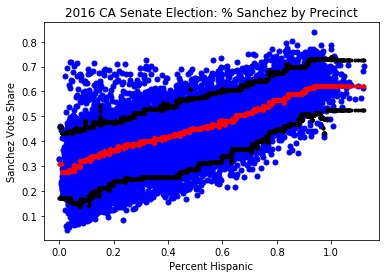

In [59]:
fig = plt.figure()
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
plt.plot(X, y_pred_r, 'r.', label=u'Prediction')
plt.plot(X, y_upper, 'k.')
plt.plot(X, y_lower, 'k.')
plt.title('2016 CA Senate Election: % Sanchez by Precinct')
plt.xlabel('Percent Hispanic')
plt.ylabel('Sanchez Vote Share')
# plt.savefig('sanchez_vote_share.jpeg',quality=90)

### Training

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5150)

In [23]:
# combine test
regressor = GradientBoostingRegressor(verbose = 0) # 1


param_dist = {"max_depth": randint(1, 11),
              "learning_rate": uniform(),
              "max_features": ["auto", "sqrt", "log2"],
              "min_samples_split": randint(2, 15),
              "min_samples_leaf": randint(2, 11),
              "n_estimators": randint(50,150)}
#              "criterion": ["friedman_mse"]

n_iter_search = 100

def exp_mean_squared_error(estimator, X, y):
    y_predicted = np.exp(estimator.predict(X))
    y_true = np.exp(y)
    return -np.sqrt(mean_squared_error(y_true, y_predicted))

random_search = RandomizedSearchCV(regressor, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring = exp_mean_squared_error,
                                   random_state = 5150,
                                   cv=5)
random_search.fit(X, y);

print(random_search.best_estimator_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.09028440030146134, loss='ls',
                          max_depth=1, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=103,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Text(0, 0.5, 'Sanchez Vote Share')

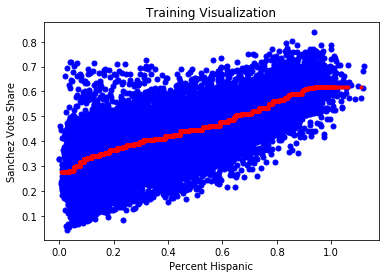

In [44]:
y_pred = random_search.best_estimator_.predict(X_test)
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
plt.plot(X_test, y_pred, 'r.', label=u'Prediction')
plt.title('Training Visualization')
plt.xlabel('Percent Hispanic')
plt.ylabel('Sanchez Vote Share')

In [25]:
np.std(np.exp(y))

0.18455301723091738

In [26]:
-random_search.best_score_

0.1328080898780295

In [27]:
-random_search.best_score_<np.std(np.exp(y))

True

Now we apply to the whole dataset

In [29]:
y_expected = random_search.best_estimator_.predict(X)

In [30]:
vote_ratio = y_expected / y

In [31]:
np.mean(y_expected),np.mean(y)

(0.4026698608342646, 0.4026698608342646)

Text(0.5, 1.0, 'Histogram Vote Ratio')

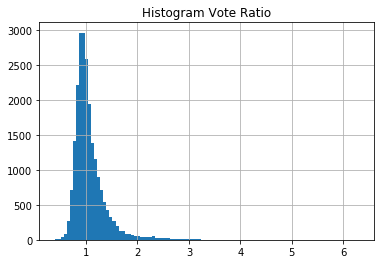

In [32]:
plt.grid()
plt.hist(vote_ratio, bins=100);
plt.title('Histogram Vote Ratio')

Text(0, 0.5, 'Cumulative Percentage')

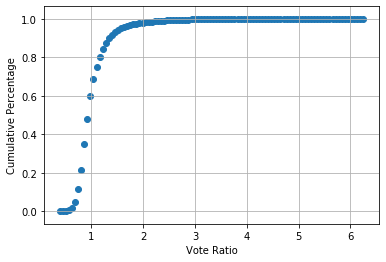

In [33]:
values, base = np.histogram(vote_ratio, bins=100)
cumulative = np.cumsum(values)
plt.scatter(base[:-1], cumulative/(len(vote_ratio)))
plt.grid()
plt.xlabel('Vote Ratio')
plt.ylabel('Cumulative Percentage')



Text(0.5, 1.0, 'Vote Ratio PDF')

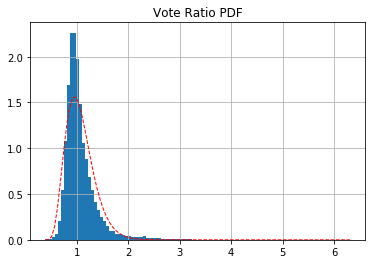

In [34]:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(vote_ratio)
plt.grid()
n, bins, patches = plt.hist(vote_ratio, bins=100, density=1)
gamma_pdf = stats.gamma.pdf(bins,a=fit_alpha, loc=fit_loc, scale=fit_beta)
l = plt.plot(bins, gamma_pdf, 'r--', linewidth=1)

plt.title('Vote Ratio PDF')

Text(0.5, 1.0, 'Vote Ratio CDF')

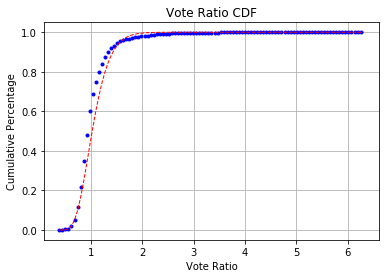

In [35]:
values, base = np.histogram(vote_ratio, bins=100)
cumulative = np.cumsum(values)
scatter = plt.plot(base[:-1], cumulative/len(vote_ratio), 'b.',label='Reference Data')
plt.grid()
plt.xlabel('Vote Ratio')
plt.ylabel('Cumulative Percentage')
line = plt.plot(base,stats.gamma.cdf(bins,a=fit_alpha, loc=fit_loc, scale=fit_beta),'r--', linewidth=1,label='Fitted Curve')
# plt.get_
#plt.legend([scatter,line],['Reference Data','Fitted Curve'],loc='best')
plt.title('Vote Ratio CDF')

Scoring

In [36]:
score = 1-stats.gamma.cdf(vote_ratio,a=fit_alpha, loc=fit_loc, scale=fit_beta)

In [105]:
mask['score'] = score

In [119]:
mask[['FIPS','pct_hispanic','pct_sanchez', 'score']].head(10)

,FIPS,pct_hispanic,pct_sanchez,score
0,60830031021,0.19,0.46,0.85
1,60830019065,0.21,0.31,0.28
2,60830019033,0.13,0.43,0.85
3,60830019034,0.35,0.41,0.54
4,60830029321,0.41,0.35,0.29
5,60830019035,0.40,0.42,0.56
6,60830019032,0.12,0.35,0.60
7,60830029302,0.20,0.31,0.30
8,60830029092,0.34,0.42,0.60
9,60830029301,0.37,0.35,0.31


Text(0.5, 1.0, 'Score Distribution')

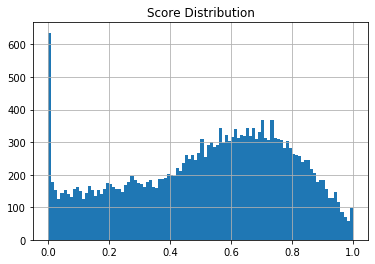

In [49]:
plt.hist(score, bins=100)
plt.grid()
plt.title('Score Distribution')

In [48]:
# plt.plot(np.exp(random_search.best_estimator_.predict(X)), '.')

In [125]:
gamma_params = {'a':fit_alpha,
                'loc':fit_loc,
                'scale':fit_beta}
str(dt.date.today())

'2020-01-03'

In [126]:
p.dump(mask[['FIPS','pct_hispanic','pct_sanchez', 'score']], open('score_results.p', 'wb'))
p.dump(gamma_params, open('score_params.p', 'wb'))


In [122]:
# data = p.load(open(score_today, 'rb'))

In [ ]:
# p.dump(random_search.best_estimator_, open(score_today, 'wb'))